Лысенко Никита 4.8 2020

# House Prices: Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

Основным методом обучения был выбран случайный лес.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
pd.set_option('display.max_columns', None)

## Начнём знакомиться с данными

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
y = train['SalePrice']

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Имеется 81 признак, из которых 38 числовых и 43 категориальных:

In [9]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
len(numeric_columns)

38

Также среди числовых признаков есть 3 категориальных, которые необходимо отделить. 

In [11]:
object_int_columns = ['MSSubClass', 'OverallQual', 'OverallCond']

In [12]:
numeric_columns = numeric_columns.drop(object_int_columns)
numeric_columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
object_columns = train.select_dtypes(include=['object']).columns
object_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
len(object_columns)

43

## Подготовка данных

Для успешного обучения нашей модели необходимо оба датасета привести в подобающий вид. 

Обработка данных разделяется на несколько этапов:

    1) Обработка пропущенных значений
    2) Удаление выбросов
    3) Нормализация данных
    4) Feature Engineering
    5) Трансформация искажённых числовых признаков
    6) Удаление признаков с высоким коэффициентом корреляции
    7) Превращение категориальных признаков в числовые 
    
Так как в нашем датасете довольно мало данных (1460 объектов), важно их сохранить по максимуму.

### 1. Обработка пропущенных значений

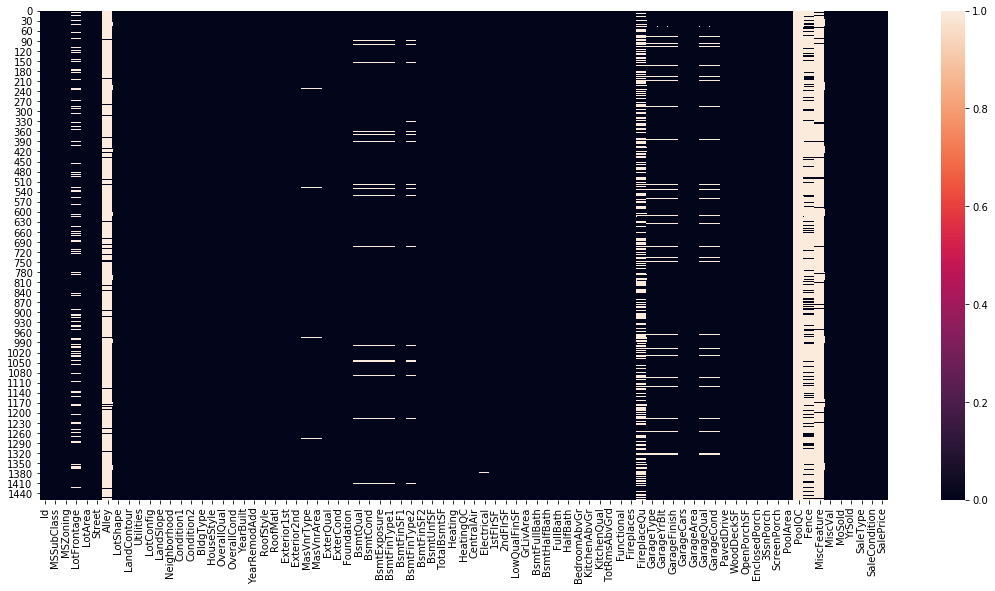

In [15]:
plt.figure(figsize=(19,9))
sns.heatmap(train.isnull())

График heatmap по пустым значениям позволяет увидеть, что происходит с нашими данными. Чёрные области - наличие какого-либо значения, а белые - отсутствие. На глаз видно, что имеется 4 почти белых столбца, означающие почти полное отсутсвие значений. 

In [16]:
def calculate_null_values(df):
    """ Функция для подсчёта пропущенных значений. """
    res = dict()
    for col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            null_percent = round(null_count / df.shape[0] * 100, 4)
            res[col] = (null_count, null_percent)
            print('{}:{} \t{}, \t{}%'.format(col, '\t' if len(col) < 7 else '', null_count, null_percent))
    return res

#### Заполенение пропусков в обучающей выборке train.csv

(Название колонки: количество пропусков, % от общего числа строк)

In [17]:
null_values_train = calculate_null_values(train)

LotFrontage: 	259, 	17.7397%
Alley:	 	1369, 	93.7671%
MasVnrType: 	8, 	0.5479%
MasVnrArea: 	8, 	0.5479%
BsmtQual: 	37, 	2.5342%
BsmtCond: 	37, 	2.5342%
BsmtExposure: 	38, 	2.6027%
BsmtFinType1: 	37, 	2.5342%
BsmtFinType2: 	38, 	2.6027%
Electrical: 	1, 	0.0685%
FireplaceQu: 	690, 	47.2603%
GarageType: 	81, 	5.5479%
GarageYrBlt: 	81, 	5.5479%
GarageFinish: 	81, 	5.5479%
GarageQual: 	81, 	5.5479%
GarageCond: 	81, 	5.5479%
PoolQC:	 	1453, 	99.5205%
Fence:	 	1179, 	80.7534%
MiscFeature: 	1406, 	96.3014%


In [18]:
len(null_values_train)

19

В обучающей выборке имеем 19 признаков c пропущенными значениями 

Глядя на heatmap и процентное соотношение пропусков в датасете, можно сделать следующие выводы:

    1) Есть 4 признака ('Alley', 'PoolQC', 'Fence', 'MiscFeature'), количество пропусков в которых слишком велико, следовательно от них можно избавиться;
    2) Один признак 'FireplaceQu' имеет около 50% пропусков. Соответственно, относительно этого признака нужно будет принять исключительное решение;
    3) Подавляющее большинство признаков имеют небольшой процент пропусков, поэтому есть смысл "побороться" за такие данные.

In [19]:
# 1. избавляемся от "плохих" признаков в обеих выборках
to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
train.drop(to_drop, axis=1, inplace=True)
object_columns = object_columns.drop(to_drop)

In [20]:
train.shape

(1460, 77)

In [21]:
# 2. более подробно посмотрим на признак 'FireplaceQu'
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

Признак 'FireplaceQu' или Fireplace quality описывает качество домашнего камина, следовательно, пропущенные признаки означают отсутствие камина как такогого. Лучшим способом "борьбы" в данной ситуации будет ввести новую категорию "Na".

In [22]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('Na')

In [23]:
# 3. Обрабатываем остальные пропуски

In [24]:
null_values_train = calculate_null_values(train)

LotFrontage: 	259, 	17.7397%
MasVnrType: 	8, 	0.5479%
MasVnrArea: 	8, 	0.5479%
BsmtQual: 	37, 	2.5342%
BsmtCond: 	37, 	2.5342%
BsmtExposure: 	38, 	2.6027%
BsmtFinType1: 	37, 	2.5342%
BsmtFinType2: 	38, 	2.6027%
Electrical: 	1, 	0.0685%
GarageType: 	81, 	5.5479%
GarageYrBlt: 	81, 	5.5479%
GarageFinish: 	81, 	5.5479%
GarageQual: 	81, 	5.5479%
GarageCond: 	81, 	5.5479%


In [25]:
train[null_values_train.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
LotFrontage     1201 non-null float64
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


Имеем 3 числовых и 11 категориальных признаков.

Для числовых признаков пропущенные значения заполним средними значениями:

In [26]:
train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [27]:
numeric_missing_columns_train = train[null_values_train.keys()].select_dtypes(include=['float64']).columns
for col in numeric_missing_columns_train:
    train[col] = train[col].fillna(0)
    
del numeric_missing_columns_train

С каждым категориальным признаком необходимо провести анализ.

In [28]:
categorical_missing_columns_train = train[null_values_train.keys()].select_dtypes(include=['object']).columns
categorical_missing_columns_train

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

Пропущенные категориальные можно заполнять двумя способами:
    
    1) взять mode и пропуски заполнить самым часто встречающимся значением
    2) ввести новую категорию NA
  
В зависимости от того, за что отвечает признак, мы и будем принимать решение по дальнейшей обработке.

В ходе детального изучения признаков было выяснено, что отсутствующее значение в датасете означает отсутствие признака как такогого в предполагаемом доме. Следовательно, для каждого (за исключением двух) признака необходимо ввести новую категорию. 

В признаке "Electrical" не предусмотрена категория для пустого значения, следовательно, в данной ситуации все пропуски будем заполнять наиболее встречающимся значением, то есть модой.
В признаке "MasVnrType" предусмотрена категория "none" для отсутствующего значения.

In [29]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [30]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['MasVnrType'] = train['MasVnrType'].fillna('None')
for col in categorical_missing_columns_train:
    train[col] = train[col].fillna('Na')

In [31]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [32]:
categorical_missing_columns_train = categorical_missing_columns_train.drop('Electrical')
categorical_missing_columns_train = categorical_missing_columns_train.drop('MasVnrType')
for col in categorical_missing_columns_train:
    train[col] = train[col].fillna('Na')
    
del categorical_missing_columns_train

In [33]:
miss_cols_train_add_to_none = ['MasVnrType']
for col in miss_cols_train_add_to_none:
    train[col] = train[col].fillna('None')
    
del miss_cols_train_add_to_none

Проверим, все ли мы обработали пустые значения:

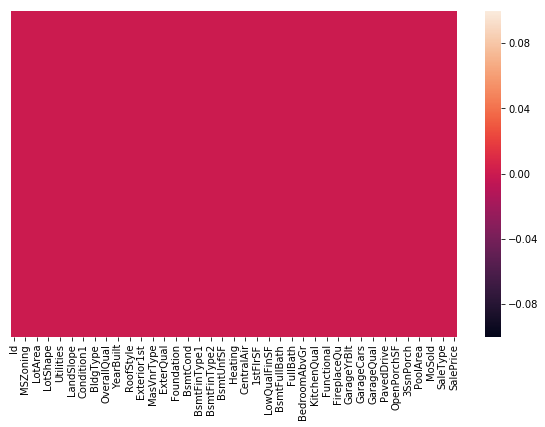

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), yticklabels=False)

In [35]:
null_values_train = calculate_null_values(train)
null_values_train

{}

Как видно по графику heatmap и функции calculate_null_values(), в тренировочном датасете больше нет пропущенных значений.

### Заполенение пропусков в тестовой выборке test.csv

In [36]:
null_values_test = calculate_null_values(test)

MSZoning: 	4, 	0.2742%
LotFrontage: 	227, 	15.5586%
Alley:	 	1352, 	92.6662%
Utilities: 	2, 	0.1371%
Exterior1st: 	1, 	0.0685%
Exterior2nd: 	1, 	0.0685%
MasVnrType: 	16, 	1.0966%
MasVnrArea: 	15, 	1.0281%
BsmtQual: 	44, 	3.0158%
BsmtCond: 	45, 	3.0843%
BsmtExposure: 	44, 	3.0158%
BsmtFinType1: 	42, 	2.8787%
BsmtFinSF1: 	1, 	0.0685%
BsmtFinType2: 	42, 	2.8787%
BsmtFinSF2: 	1, 	0.0685%
BsmtUnfSF: 	1, 	0.0685%
TotalBsmtSF: 	1, 	0.0685%
BsmtFullBath: 	2, 	0.1371%
BsmtHalfBath: 	2, 	0.1371%
KitchenQual: 	1, 	0.0685%
Functional: 	2, 	0.1371%
FireplaceQu: 	730, 	50.0343%
GarageType: 	76, 	5.209%
GarageYrBlt: 	78, 	5.3461%
GarageFinish: 	78, 	5.3461%
GarageCars: 	1, 	0.0685%
GarageArea: 	1, 	0.0685%
GarageQual: 	78, 	5.3461%
GarageCond: 	78, 	5.3461%
PoolQC:	 	1456, 	99.7944%
Fence:	 	1169, 	80.1234%
MiscFeature: 	1408, 	96.5045%
SaleType: 	1, 	0.0685%


In [37]:
len(null_values_test)

33

В тестовой выборке имеем 33 признака c пропущенными значениями

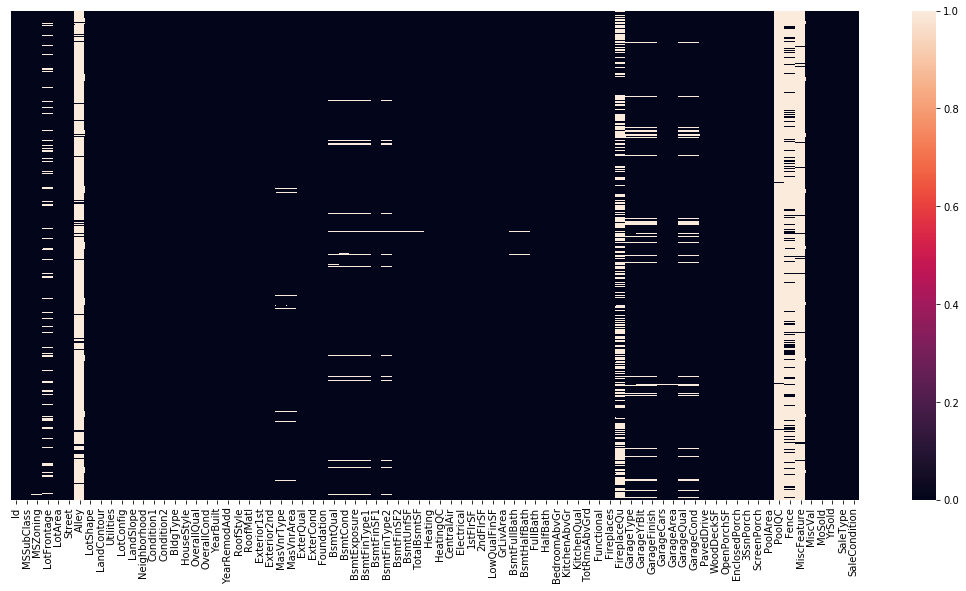

In [38]:
plt.figure(figsize=(19,9))
sns.heatmap(test.isnull(), yticklabels=False)

Имеем 3 числовых и 11 категориальных признаков.

Так же как и в тренировочной, избавляемся от признаков со слишком большим процентом пропусков

In [39]:
# 1. избавляемся от "плохих" признаков в обеих выборках
test.drop(to_drop, axis=1, inplace=True)

In [40]:
null_values_test = calculate_null_values(test)

MSZoning: 	4, 	0.2742%
LotFrontage: 	227, 	15.5586%
Utilities: 	2, 	0.1371%
Exterior1st: 	1, 	0.0685%
Exterior2nd: 	1, 	0.0685%
MasVnrType: 	16, 	1.0966%
MasVnrArea: 	15, 	1.0281%
BsmtQual: 	44, 	3.0158%
BsmtCond: 	45, 	3.0843%
BsmtExposure: 	44, 	3.0158%
BsmtFinType1: 	42, 	2.8787%
BsmtFinSF1: 	1, 	0.0685%
BsmtFinType2: 	42, 	2.8787%
BsmtFinSF2: 	1, 	0.0685%
BsmtUnfSF: 	1, 	0.0685%
TotalBsmtSF: 	1, 	0.0685%
BsmtFullBath: 	2, 	0.1371%
BsmtHalfBath: 	2, 	0.1371%
KitchenQual: 	1, 	0.0685%
Functional: 	2, 	0.1371%
FireplaceQu: 	730, 	50.0343%
GarageType: 	76, 	5.209%
GarageYrBlt: 	78, 	5.3461%
GarageFinish: 	78, 	5.3461%
GarageCars: 	1, 	0.0685%
GarageArea: 	1, 	0.0685%
GarageQual: 	78, 	5.3461%
GarageCond: 	78, 	5.3461%
SaleType: 	1, 	0.0685%


In [41]:
test[null_values_test.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
MSZoning        1455 non-null object
LotFrontage     1232 non-null float64
Utilities       1457 non-null object
Exterior1st     1458 non-null object
Exterior2nd     1458 non-null object
MasVnrType      1443 non-null object
MasVnrArea      1444 non-null float64
BsmtQual        1415 non-null object
BsmtCond        1414 non-null object
BsmtExposure    1415 non-null object
BsmtFinType1    1417 non-null object
BsmtFinSF1      1458 non-null float64
BsmtFinType2    1417 non-null object
BsmtFinSF2      1458 non-null float64
BsmtUnfSF       1458 non-null float64
TotalBsmtSF     1458 non-null float64
BsmtFullBath    1457 non-null float64
BsmtHalfBath    1457 non-null float64
KitchenQual     1458 non-null object
Functional      1457 non-null object
FireplaceQu     729 non-null object
GarageType      1383 non-null object
GarageYrBlt     1381 non-null float64
GarageFinish    1381 non-null obje

Пропущенные числовые значения также заполним средними значениями:

In [42]:
numeric_missing_columns_test = test[null_values_test.keys()].select_dtypes(include=['float64']).columns
for col in numeric_missing_columns_test:
    test[col] = test[col].fillna(0)
    
del numeric_missing_columns_test

##### Теперь заполним пустоты с категориальными значениями. 

In [43]:
categorical_missing_columns_test = test[null_values_test.keys()].select_dtypes(include=['object']).columns
categorical_missing_columns_test

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

В ходе детального изучения признаков в тестовой выборке было выяснено, что решение по устранению пустых объектов необходимо принимать, глядя на описание каждого признака.

    FireplaceQu - вводим новую категорию NA
    MSZoning - mode, заполняем пустоты наиболее встречающимся значением
    Utilities - mode, заполняем пустоты наиболее встречающимся значением
    Exterior1st - mode, заполняем пустоты наиболее встречающимся значением
    Exterior2nd - mode, заполняем пустоты наиболее встречающимся значением
    MasVnrType - есть категория none, в которубю необходимо добавить все пропущенные значения
    BsmtQual - вводим новую категорию NA
    BsmtCond - вводим новую категорию NA
    BsmtExposure - вводим новую категорию NA
    BsmtFinType1 - вводим новую категорию NA
    BsmtFinType2 - вводим новую категорию NA
    KitchenQual - mode, заполняем пустоты наиболее встречающимся значением
    Functional - mode, заполняем пустоты наиболее встречающимся значением
    GarageType - вводим новую категорию NA
    GarageFinish - вводим новую категорию NA
    GarageQual - вводим новую категорию NA
    GarageCond - вводим новую категорию NA
    SaleType - mode, заполняем пустоты наиболее встречающимся значением

In [44]:
miss_cols_test_mode = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 
                       'SaleType']

miss_cols_test_new_cat_NA = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                             'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

miss_cols_test_add_to_none = ['MasVnrType']

In [45]:
for col in miss_cols_test_mode:
    test[col] = test[col].fillna(test[col].mode()[0])

del miss_cols_test_mode

In [46]:
for col in miss_cols_test_new_cat_NA:
    test[col] = test[col].fillna('Na')
    
del miss_cols_test_new_cat_NA

In [47]:
for col in miss_cols_test_add_to_none:
    test[col] = test[col].fillna('None')
    
del miss_cols_test_add_to_none

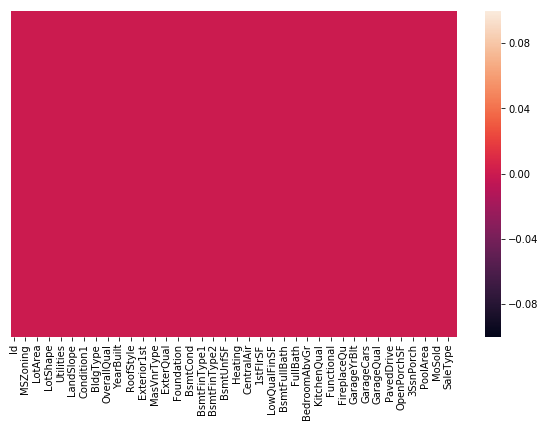

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(test.isnull(), yticklabels=False)

In [49]:
null_values_test = calculate_null_values(test)
null_values_test

{}

Как видно по графику heatmap и функции calculate_null_values(), в тестовом датасете больше нет пропущенных значений.

Первый этап обработки данных завершён.

In [50]:
train.to_csv("data/final_without_miss.csv", index=False)
test.to_csv("data/final_without_miss.csv", index=False)

## 2. Удаление выбросов

Для того чтобы отследить выбросы, необходимо посмотреть на каждый числовой признак относительно целевого признака. 

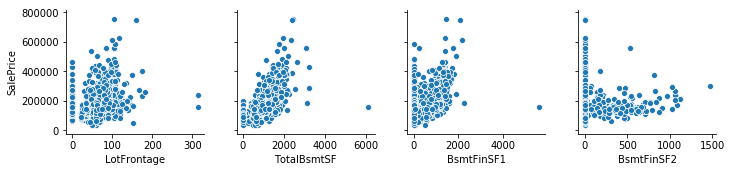

In [51]:
cols5 = ['LotFrontage', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2']
sns.pairplot(train, y_vars=['SalePrice'], x_vars=cols5)

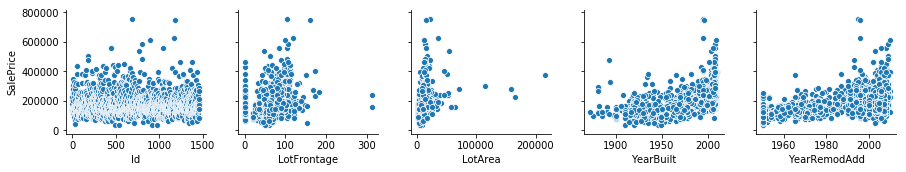

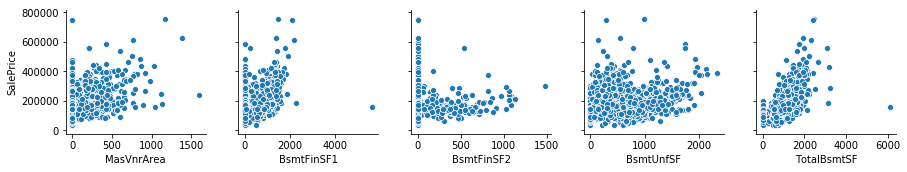

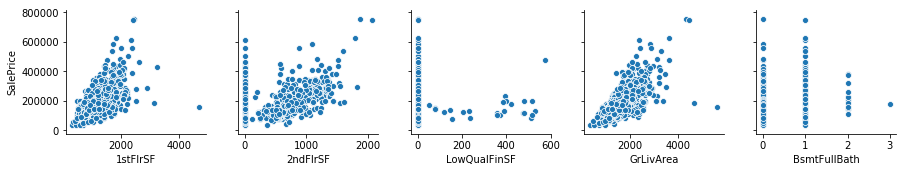

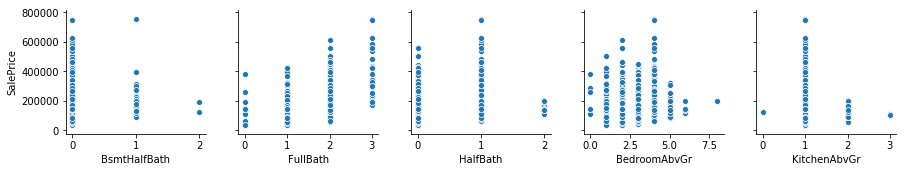

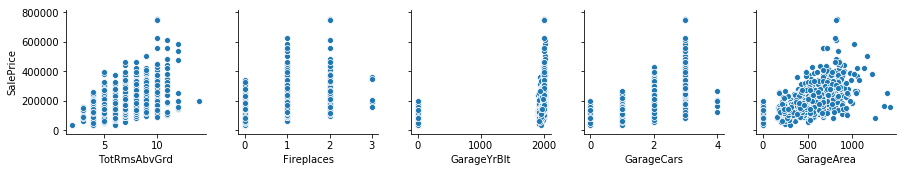

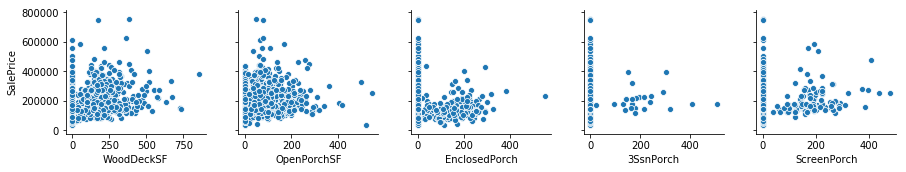

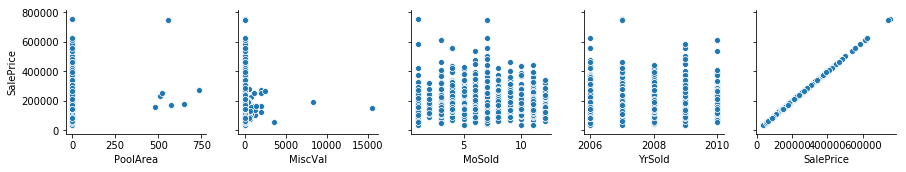

In [52]:
cols5 = []
for i in range(0, len(numeric_columns), 5):
    cols5.append(numeric_columns[i : i + 5])
    
# Далее выыведем графики зависимостей численных признаков от целевой переменной
for x in cols5:
    sns.pairplot(train, y_vars=['SalePrice'], x_vars=x)

Глядя на данные графики, можно сделать выводы о выбросах для каждого признака

Для подавляющего большинства признаков выбросов не наблюдается.
Однако есть признаки, у которых они всё таки наблюдаются:

    "LotArea" > 100000
    "LotFrontage" > 300
    "BsmtFinSF1" > 4000 
    "TotalBsmtSF" > 6000
    "1stFlrSF" > 4000
    "GrLivArea" > 5000
   
Запишем выбросы в переменную, чтобы далее от них избавиться.

In [53]:
outliers = {
    "LotArea": 100000, 
    "LotFrontage": 300,
    "BsmtFinSF1": 4000, 
    "TotalBsmtSF": 6000, 
    "1stFlrSF": 4000, 
    "GrLivArea": 5000
}

In [54]:
train.shape

(1460, 77)

In [55]:
for col in outliers: 
    train = train[train[col] < outliers[col]]

In [56]:
train.shape

(1454, 77)

In [57]:
train.to_csv("data/final_without_outliers.csv", index=False)
test.to_csv("data/final_without_outliers.csv", index=False)

## 3. Нормализация данных

Алгоритм случайного леса не нуждается в нормализации данных. Следовательно, данный этап предобработки можно пропустить.

## 4. Feature Engineering

In [58]:
train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['TotalBath'] = train['BsmtFullBath'] + train['FullBath'] + (train['BsmtHalfBath'] + train['HalfBath']) * 0.5
train['TotalPorchSF'] = (train['OpenPorchSF'] + train['3SsnPorch'] + 
                         train['EnclosedPorch'] + train['ScreenPorch'] + 
                         train['WoodDeckSF'])

test['TotalArea'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['TotalBath'] = test['BsmtFullBath'] + test['FullBath'] + (test['BsmtHalfBath'] + test['HalfBath']) * 0.5
test['TotalPorchSF'] = (test['OpenPorchSF'] + test['3SsnPorch'] + 
                        test['EnclosedPorch'] + test['ScreenPorch'] + 
                        test['WoodDeckSF'])

to_drop = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 
          'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF']

train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
numeric_columns = numeric_columns.drop(to_drop)
numeric_columns.append(pd.Index(['TotalArea', 'TotalBath', 'TotalPorchSF']))

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalArea', 'TotalBath',
       'TotalPorchSF'],
      dtype='object')

In [59]:
train.shape

(1454, 68)

## 5. Трансформация искажённых числовых признаков

In [60]:
# train = pd.read_csv("data/final_without_outliers.csv")
# test = pd.read_csv("data/final_without_outliers.csv")

Искажённые или асимметричные признаки - ещё одна проблема, которая может повлиять на качество модели. Алгоритмы машинного обучения подразумевают, что на вход подаются данные,имеющий гауссово распределие. 

Посмотрим на асимметрию в данных и преобразуем те признаки, у которых коэффициент асимметрии велик.

In [61]:
skewed = train[numeric_columns].apply(lambda x: stats.skew(x.astype('float')))
skewed

Id              -0.002172
LotFrontage     -0.297417
LotArea          3.939136
YearBuilt       -0.613934
YearRemodAdd    -0.502464
MasVnrArea       2.694851
BsmtFinSF1       0.799002
BsmtFinSF2       4.279205
BsmtUnfSF        0.916339
LowQualFinSF     8.982890
GrLivArea        1.127647
BedroomAbvGr     0.213924
KitchenAbvGr     4.473226
TotRmsAbvGrd     0.667398
Fireplaces       0.632566
GarageYrBlt     -3.856086
GarageCars      -0.337971
GarageArea       0.133894
PoolArea        15.910404
MiscVal         24.469277
MoSold           0.214573
YrSold           0.096121
SalePrice        1.896903
dtype: float64

In [62]:
skewed = skewed[abs(skewed) > 0.5]
skewed

LotArea          3.939136
YearBuilt       -0.613934
YearRemodAdd    -0.502464
MasVnrArea       2.694851
BsmtFinSF1       0.799002
BsmtFinSF2       4.279205
BsmtUnfSF        0.916339
LowQualFinSF     8.982890
GrLivArea        1.127647
KitchenAbvGr     4.473226
TotRmsAbvGrd     0.667398
Fireplaces       0.632566
GarageYrBlt     -3.856086
PoolArea        15.910404
MiscVal         24.469277
SalePrice        1.896903
dtype: float64

Имеется 16 признаков с высоким коэффициентом асимметрии.

In [63]:
len(skewed)

16

Посмотрим на графики распределения наших численных признаков

In [64]:
def plot_skewed(df, skewed):
    plt.figure(figsize=(25,20))
    for i in range(len(skewed)):
        plt.subplot(7, 4, i + 1)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.5)
        ax = sns.distplot(df[skewed.index[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed.index[i]].skew())], fontsize = 'xx-large')
        ax.set_xlabel(skewed.index[i], fontsize = 20)

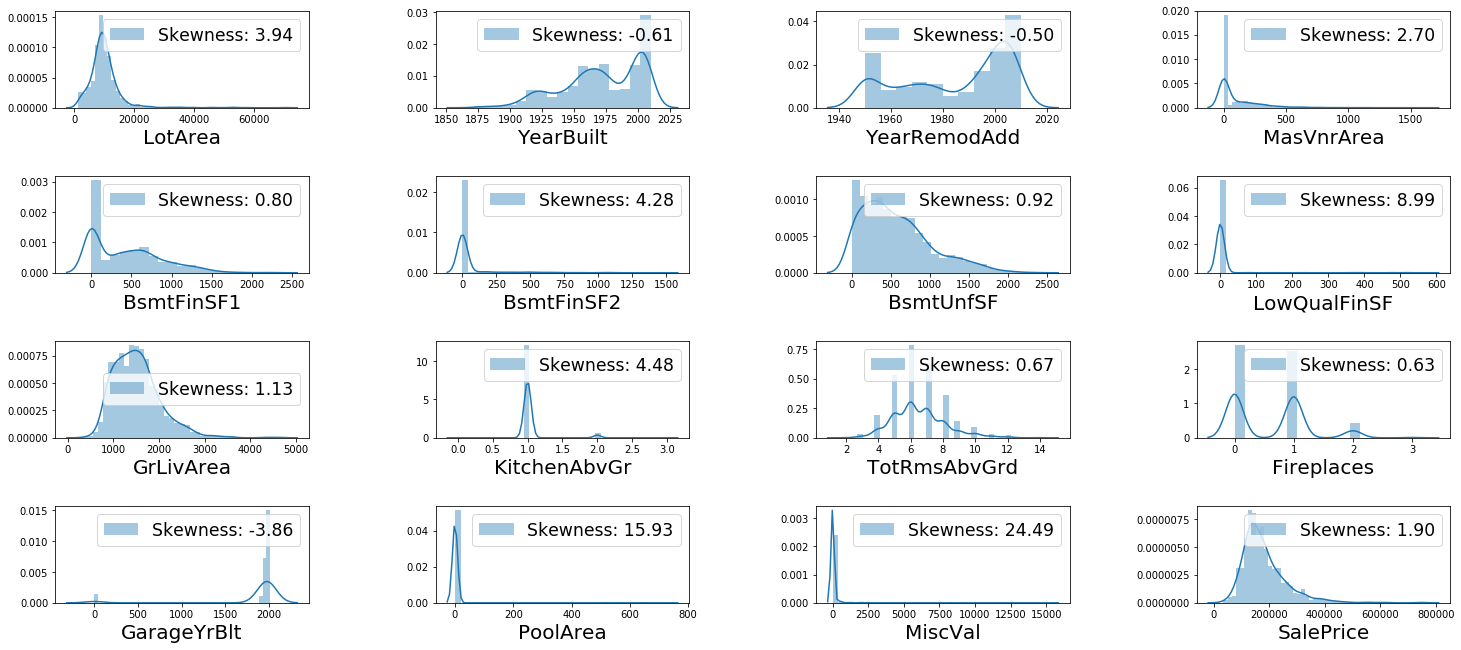

In [65]:
plot_skewed(df=train, skewed=skewed)

По графикам видно, что большинство наших признаков имеют позитивную ассиметрию (или правую). Побороться с данным видос ассиметрии можно с помощью логарифмирования.

Для примера посмотрим на распределение данных целевого признака "SalePrice" до и после логарифмирования. 

count      1454.000000
mean     180577.713893
std       79310.982054
min       34900.000000
25%      129900.000000
50%      162950.000000
75%      213497.500000
max      755000.000000
Name: SalePrice, dtype: float64

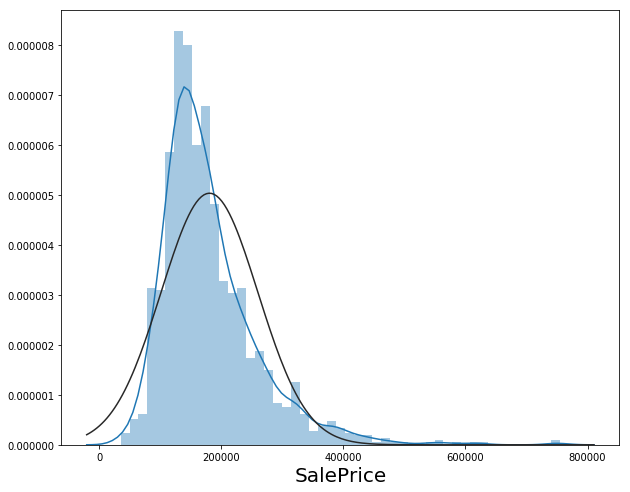

In [66]:
ax = sns.distplot(train['SalePrice'], fit=stats.norm)
ax.set_xlabel('SalePrice', fontsize = 20)
train['SalePrice'].describe()

count    1454.000000
mean       12.022289
std         0.398972
min        10.460242
25%        11.774520
50%        12.001199
75%        12.271380
max        13.534473
Name: SalePrice, dtype: float64

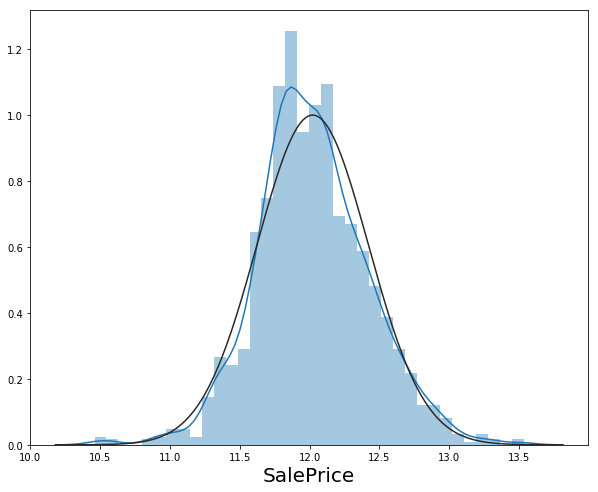

In [67]:
ax = sns.distplot(np.log(train['SalePrice']), fit=stats.norm)
ax.set_xlabel('SalePrice', fontsize = 20)
np.log(train['SalePrice']).describe()

Видим, что после логарифмирования целевой признак действительно приобрел вид гауссового распределения.

Далее применим логарифмирование для всех числовых признаков в обоих датасетах. 

In [68]:
# так как log() превращает 0 в -inf, то используем функцию log(x+1), которая лучше работает с маленькими значениями
for col in skewed.index:
    train[col] = np.log(train[col] + 1)
    if col == 'SalePrice':
        continue
    test[col] = np.log(test[col] + 1)

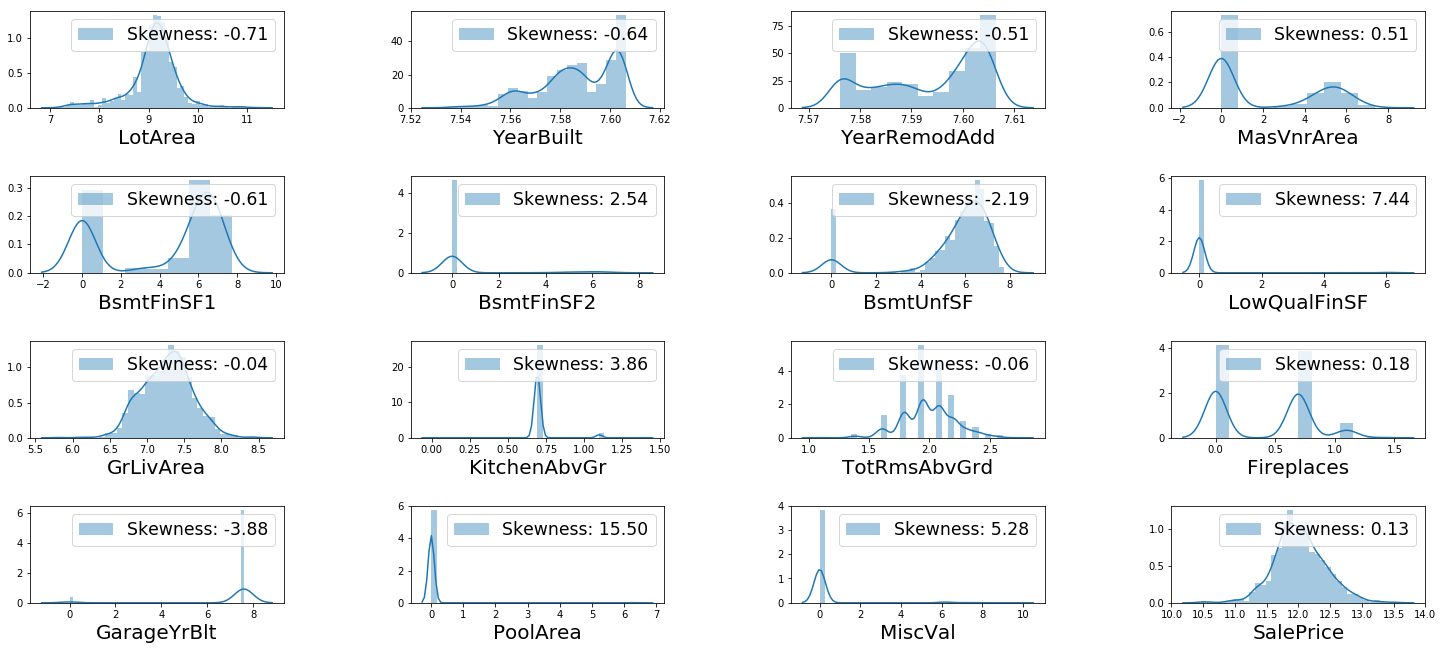

In [69]:
plot_skewed(df=train, skewed=skewed)

In [70]:
# train['BsmtUnfSF'] = np.exp(train['BsmtUnfSF']) - 1
# test['BsmtUnfSF'] = np.exp(test['BsmtUnfSF']) - 1

In [71]:
skewed = train[numeric_columns].apply(lambda x: stats.skew(x.astype('float')))
skewed = skewed[abs(skewed) > 0.5]
len(skewed)

12

С помощью логарифмирования удалось снизить коэффициент асимметрии у некоторых признаков, однако от остальных, у которых коэффициент велик, можно избавиться.

In [72]:
to_drop = skewed[abs(skewed) > 1]
to_drop

BsmtFinSF2       2.535243
BsmtUnfSF       -2.183377
LowQualFinSF     7.436501
KitchenAbvGr     3.855987
GarageYrBlt     -3.873904
PoolArea        15.480172
MiscVal          5.271790
dtype: float64

In [73]:
len(to_drop)

7

In [74]:
to_drop = list(to_drop.index)
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
numeric_columns = pd.Index(numeric_columns.drop(to_drop))

In [75]:
del skewed

## 6. Удаление признаков с высоким коэффициентом корреляции

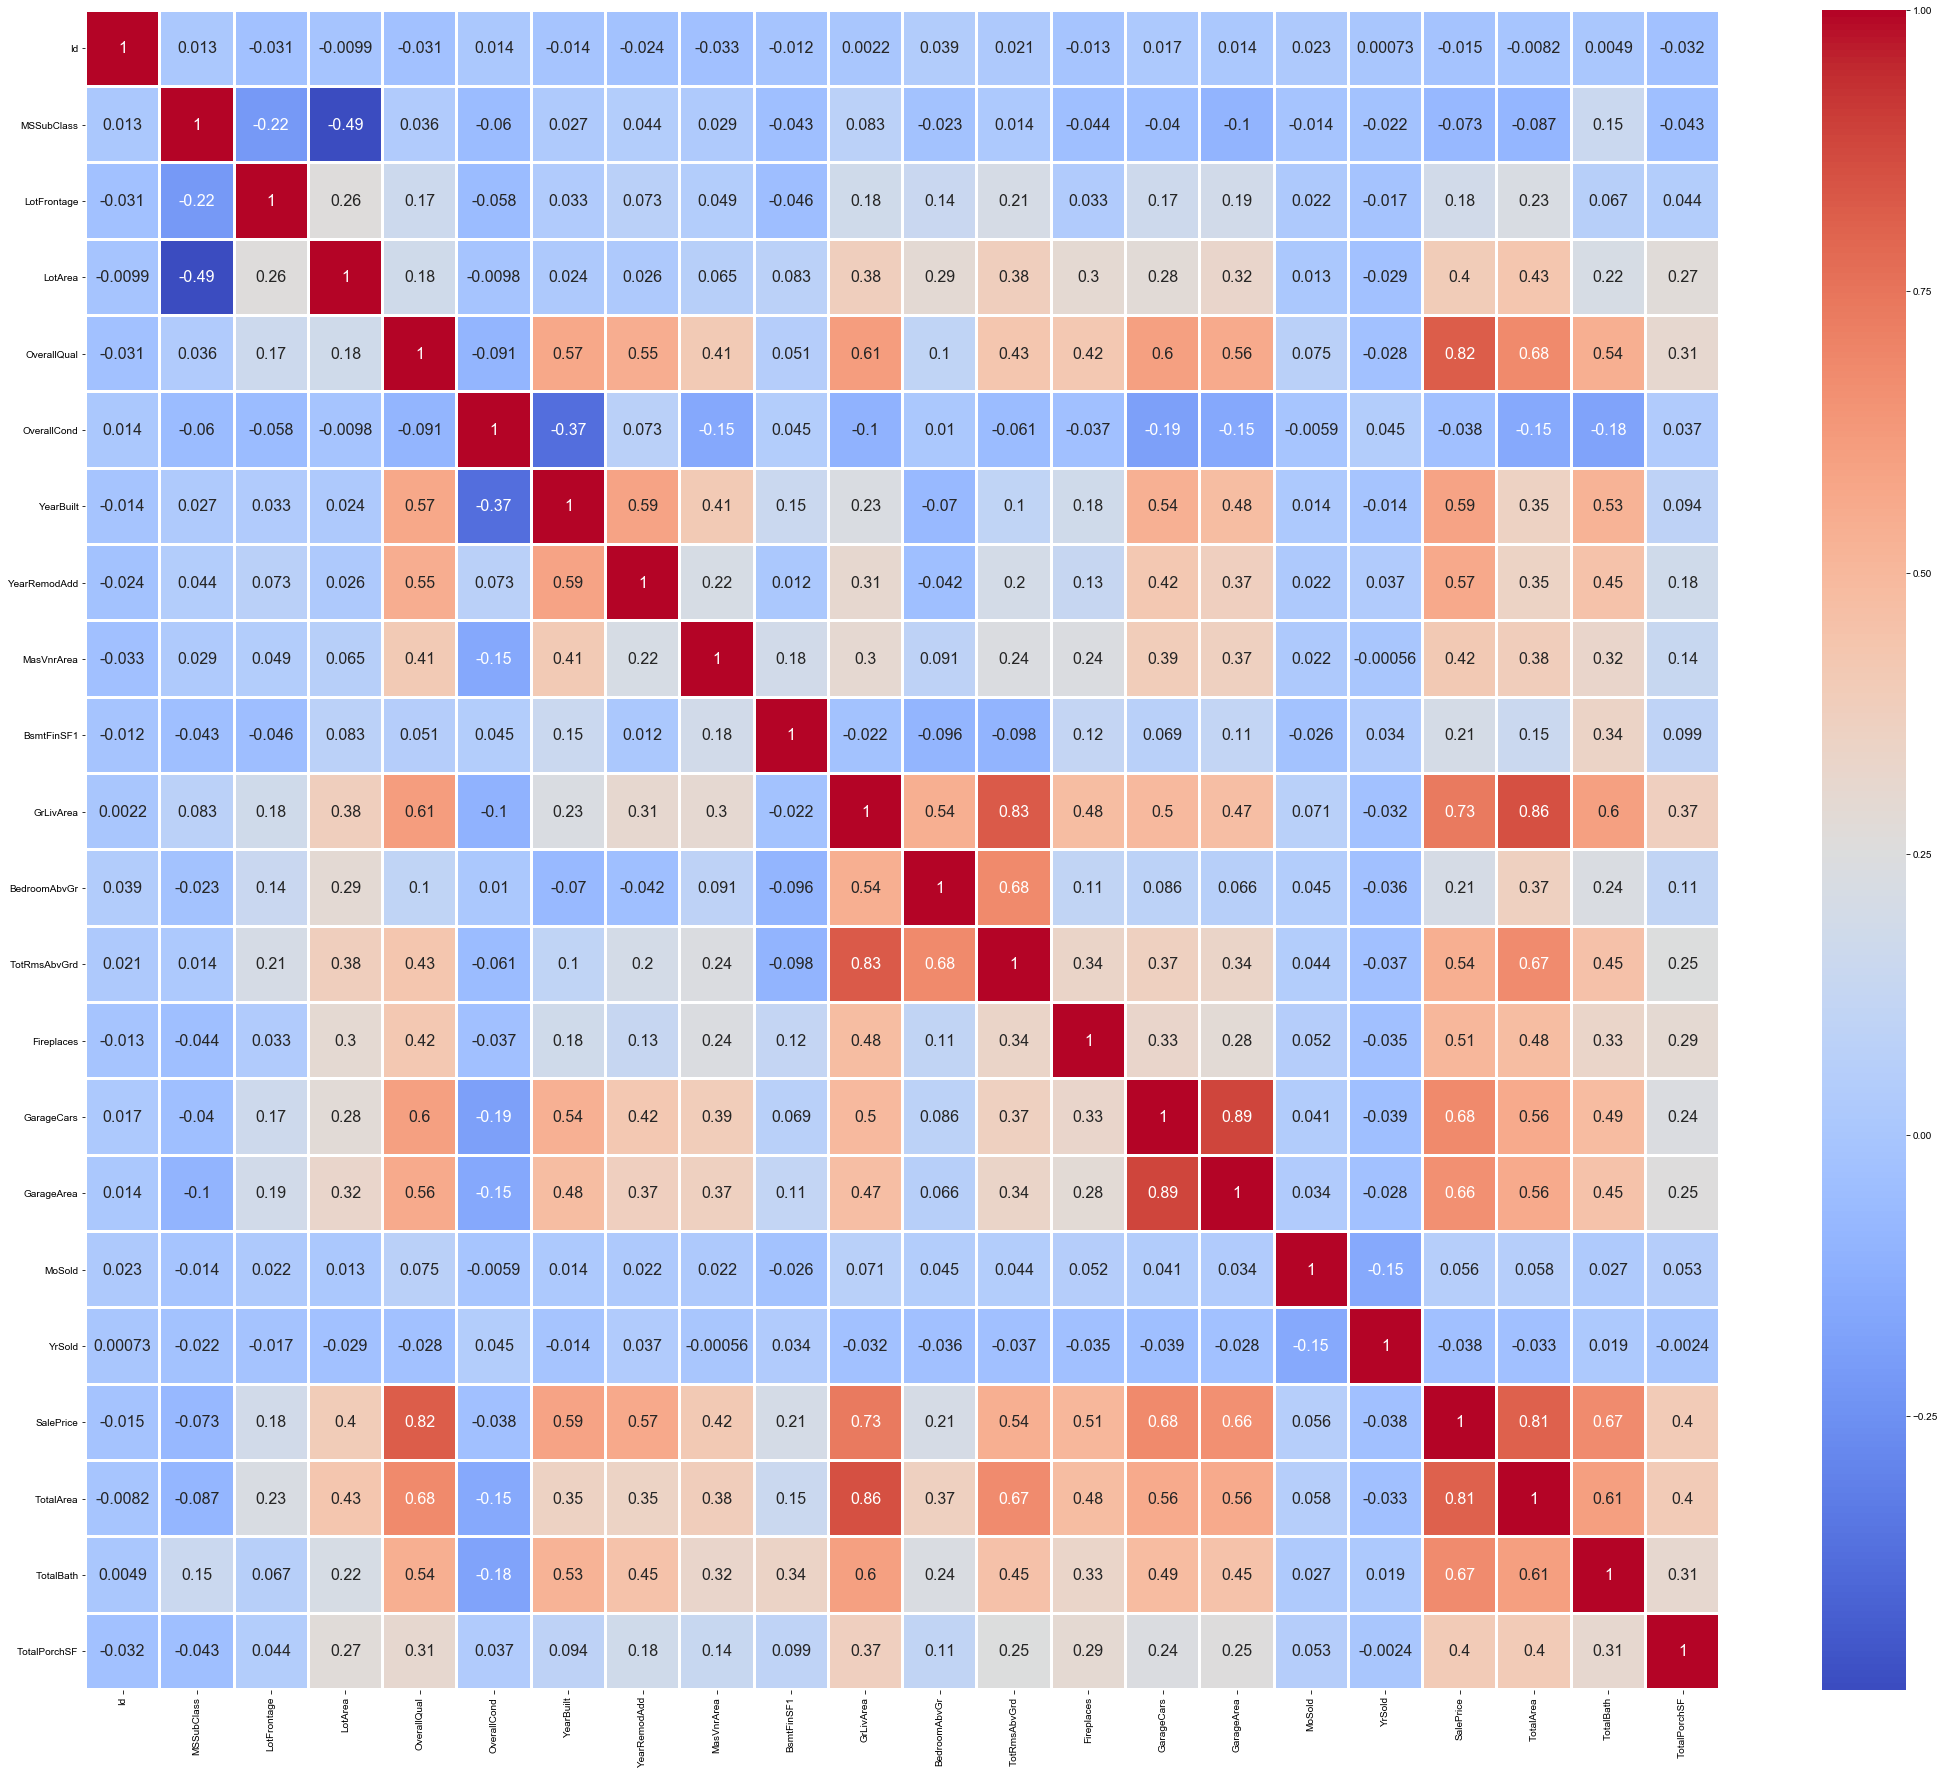

In [76]:
plt.figure(figsize=(30,25))
ax = sns.heatmap(train.corr(), cmap = "coolwarm", annot=True, linewidth=2, annot_kws={'fontsize':16})
sns.set(font_scale=1.5)
plt.tight_layout()

Посмотрим на признаки с максимальными значениями корреляции по отношению друг к другу

In [77]:
corr = train.corr()
corr_list = list()
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        col1 = numeric_columns[i];
        col2 = numeric_columns[j];
        if corr[col1][col2] > 0.5:
            corr_list.append((col1, col2, corr[col1][col2]))

In [78]:
list(reversed(sorted(corr_list, key=lambda x: x[-1])))

[('GarageCars', 'GarageArea', 0.8879255985464204),
 ('GrLivArea', 'TotRmsAbvGrd', 0.8294525081156641),
 ('GrLivArea', 'SalePrice', 0.7340473091546997),
 ('BedroomAbvGr', 'TotRmsAbvGrd', 0.6841712997607883),
 ('GarageCars', 'SalePrice', 0.6816053774519594),
 ('GarageArea', 'SalePrice', 0.656710872737529),
 ('YearBuilt', 'YearRemodAdd', 0.5907813189610901),
 ('YearBuilt', 'SalePrice', 0.5878101014333038),
 ('YearRemodAdd', 'SalePrice', 0.568108876106275),
 ('TotRmsAbvGrd', 'SalePrice', 0.5421964605731177),
 ('GrLivArea', 'BedroomAbvGr', 0.54148590874836),
 ('YearBuilt', 'GarageCars', 0.536360872090903),
 ('Fireplaces', 'SalePrice', 0.5068433698088727)]

In [79]:
to_drop = ['GarageCars', 'TotRmsAbvGrd', 'YearBuilt']

In [80]:
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
numeric_columns = numeric_columns.drop(to_drop)

In [81]:
train.shape

(1454, 58)

## 7. Превращение категориальных признаков в числовые

Посмотрим подробнее на каждый категориальный признак

In [82]:
def plot_barh(df, cols, ncols=4):
    num_col = 0
    for i in range(len(cols) // ncols):
        fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(12, 3), dpi=100)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.5)
        for j in range(ncols):
            ax = df[cols[num_col]].value_counts().plot.barh(ax=axes[j], fontsize=10)
            ax.set_xlabel(cols[num_col], fontsize = 12)
            num_col += 1

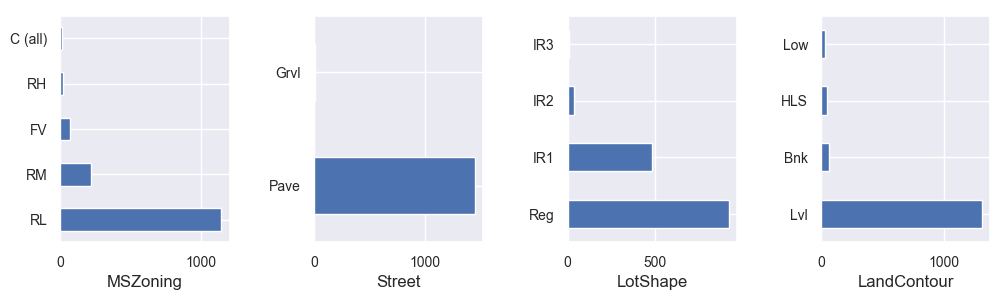

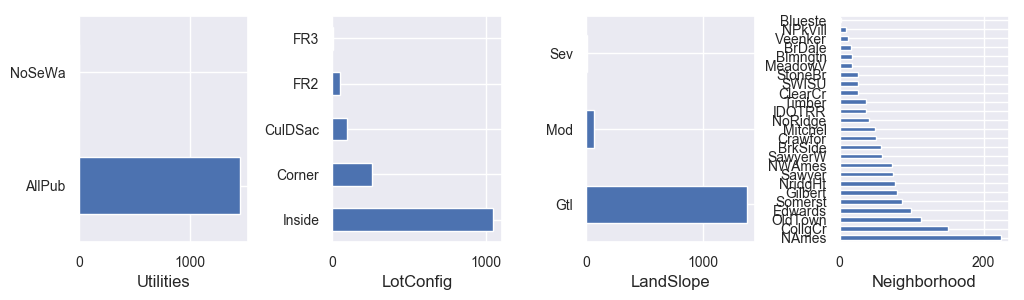

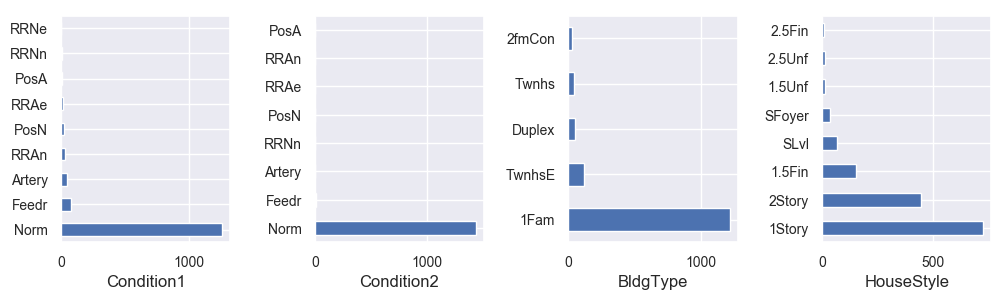

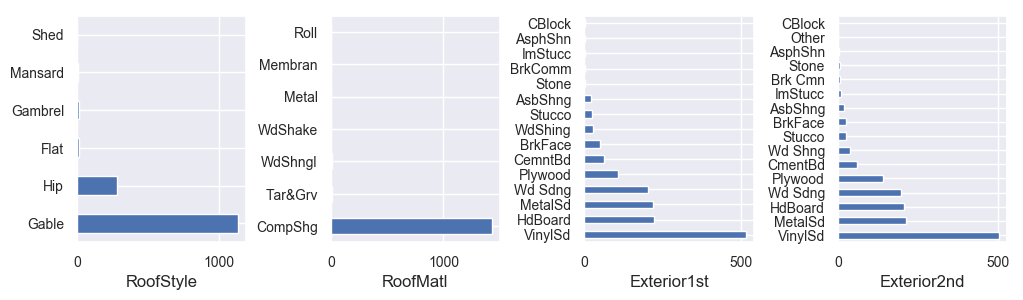

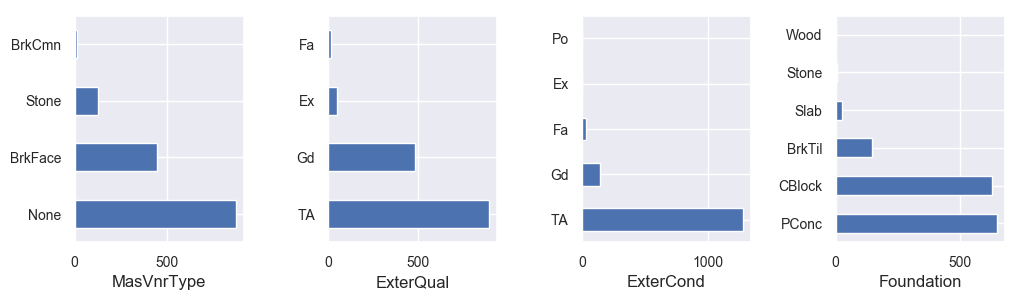

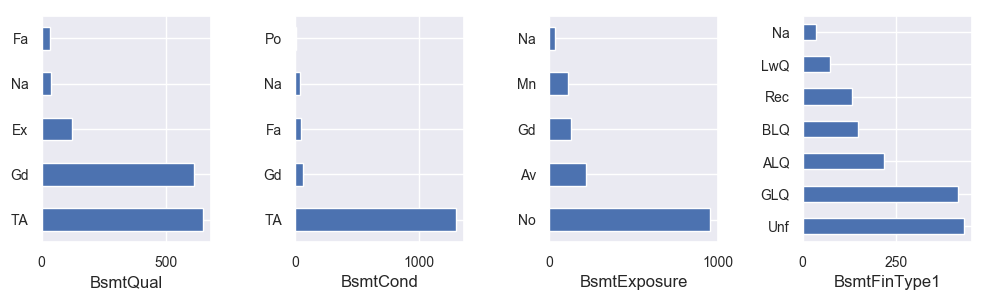

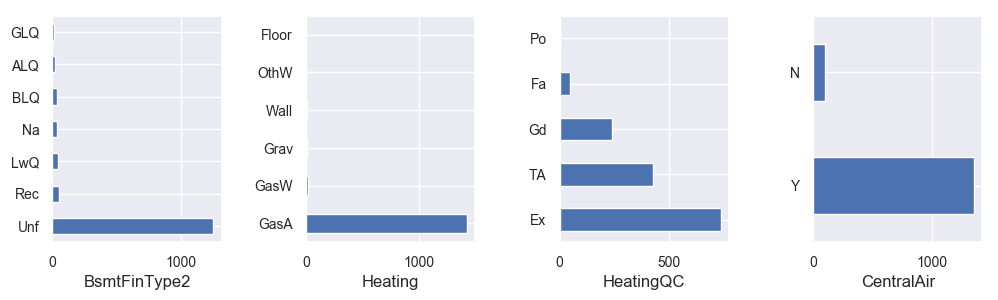

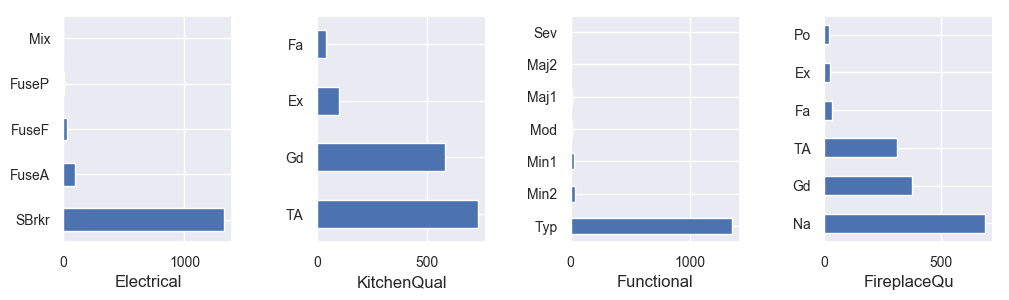

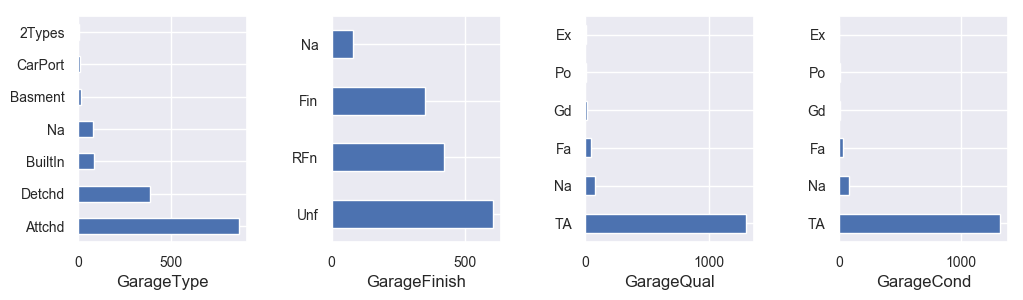

In [83]:
plot_barh(df=train, cols=object_columns)

Имеется несколько признаков, в которых одна категория значительно преобладает над другими.  

Например:

Подобные признаки не смогут положительно повлиять на качество нашей модели.

In [84]:
to_drop = ['Street', 'Utilities', 'Condition2', 'Heating', 'RoofMatl'] 

In [85]:
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
object_columns = object_columns.drop(to_drop)

In [86]:
train.shape

(1454, 53)

In [87]:
# One-hot-encoding
# train = pd.get_dummies(train, columns=list(object_columns) + object_int_columns)
# test = pd.get_dummies(test, columns=list(object_columns) + object_int_columns)
# train.columns

In [88]:
# X_train.drop(['Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 
#                         'Exterior2nd_Other', 'GarageQual_Ex', 'HouseStyle_2.5Fin'], axis=1, inplace=True)
# X_test.drop(['MSSubClass_150'], axis=1, inplace=True)

In [89]:
label_encoder = LabelEncoder()

for col in object_columns:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.fit_transform(test[col])
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,TotalBath,TotalPorchSF
0,1,60,3,65.0,9.042040,3,3,4,0,5,2,0,5,7,5,7.602900,1,12,13,1,5.283204,2,4,2,2,4,4,2,6.561031,6,0,1,4,7.444833,3,2,6,0.000000,3,1,2,548,5,5,2,2,2008,8,4,12.247699,2566,3.5,61
1,2,20,3,80.0,9.169623,3,3,2,0,24,1,0,2,6,8,7.589336,1,8,8,2,0.000000,3,4,1,2,4,1,0,6.886532,6,0,1,4,7.141245,3,3,6,0.693147,5,1,2,460,5,5,2,5,2007,8,4,12.109016,2524,2.5,298
2,3,60,3,68.0,9.328212,0,3,4,0,5,2,0,5,7,5,7.602401,1,12,13,1,5.093750,2,4,2,2,4,2,2,6.188264,6,0,1,4,7.488294,3,2,6,0.693147,5,1,2,608,5,5,2,9,2008,8,4,12.317171,2706,3.5,42
3,4,70,3,60.0,9.164401,0,3,0,0,6,2,0,5,7,5,7.586296,1,13,15,2,0.000000,3,4,0,4,1,4,0,5.379897,6,2,1,4,7.448916,3,2,6,0.693147,2,5,3,642,5,5,2,2,2006,8,0,11.849405,2473,2.0,307
4,5,60,3,84.0,9.565284,0,3,2,0,15,2,0,5,8,5,7.601402,1,12,13,1,5.860786,2,4,2,2,4,0,2,6.486161,6,0,1,4,7.695758,4,2,6,0.693147,5,1,2,836,5,5,2,12,2008,8,4,12.429220,3343,3.5,276


Данные готовы для обучения!

In [90]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,TotalBath,TotalPorchSF
0,1,60,3,65.0,9.042040,3,3,4,0,5,2,0,5,7,5,7.602900,1,12,13,1,5.283204,2,4,2,2,4,4,2,6.561031,6,0,1,4,7.444833,3,2,6,0.000000,3,1,2,548,5,5,2,2,2008,8,4,12.247699,2566,3.5,61
1,2,20,3,80.0,9.169623,3,3,2,0,24,1,0,2,6,8,7.589336,1,8,8,2,0.000000,3,4,1,2,4,1,0,6.886532,6,0,1,4,7.141245,3,3,6,0.693147,5,1,2,460,5,5,2,5,2007,8,4,12.109016,2524,2.5,298
2,3,60,3,68.0,9.328212,0,3,4,0,5,2,0,5,7,5,7.602401,1,12,13,1,5.093750,2,4,2,2,4,2,2,6.188264,6,0,1,4,7.488294,3,2,6,0.693147,5,1,2,608,5,5,2,9,2008,8,4,12.317171,2706,3.5,42
3,4,70,3,60.0,9.164401,0,3,0,0,6,2,0,5,7,5,7.586296,1,13,15,2,0.000000,3,4,0,4,1,4,0,5.379897,6,2,1,4,7.448916,3,2,6,0.693147,2,5,3,642,5,5,2,2,2006,8,0,11.849405,2473,2.0,307
4,5,60,3,84.0,9.565284,0,3,2,0,15,2,0,5,8,5,7.601402,1,12,13,1,5.860786,2,4,2,2,4,0,2,6.486161,6,0,1,4,7.695758,4,2,6,0.693147,5,1,2,836,5,5,2,12,2008,8,4,12.429220,3343,3.5,276


In [91]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,TotalArea,TotalBath,TotalPorchSF
0,1461,20,2,80.0,9.360741,3,3,4,0,12,1,0,2,5,6,7.581720,1,10,12,2,0.000000,3,4,1,4,4,4,5,6.150603,3,4,1,3,6.799056,2,3,6,0.000000,3,1,3,730.0,4,5,2,6,2010,8,4,1778.0,1.0,260
1,1462,20,3,81.0,9.565775,0,3,0,0,12,2,0,2,6,6,7.580189,3,11,13,1,4.691348,3,4,1,4,4,4,0,6.828712,6,4,1,3,7.192934,3,2,6,0.000000,3,1,3,312.0,4,5,2,6,2010,8,4,2658.0,1.5,429
2,1463,60,3,74.0,9.534668,0,3,4,0,8,2,0,4,5,5,7.600402,1,10,12,2,0.000000,3,4,2,2,4,4,2,6.674561,6,2,1,3,7.396335,3,3,6,0.693147,5,1,0,482.0,4,5,2,3,2010,8,4,2557.0,2.5,246
3,1464,60,3,78.0,9.208238,0,3,4,0,8,2,0,4,6,6,7.600402,1,10,12,1,3.044522,3,4,2,4,4,4,2,6.401917,6,0,1,3,7.380879,3,2,6,0.693147,2,1,0,470.0,4,5,2,6,2010,8,4,2530.0,2.5,396
4,1465,120,3,43.0,8.518392,0,1,4,0,22,2,4,2,8,5,7.597396,1,6,6,2,0.000000,2,4,2,2,4,4,0,5.575949,6,0,1,3,7.155396,2,2,6,0.000000,3,1,2,506.0,4,5,2,1,2010,8,4,2560.0,2.0,226


In [92]:
train.to_csv("data/final_train.csv", index=False)
test.to_csv("data/final_test.csv", index=False)

## Обучение модели

In [93]:
train = pd.read_csv("data/final_train.csv")
test = pd.read_csv("data/final_test.csv")

In [94]:
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']
X_test = test.drop(['Id'], axis=1)
y_test = pd.read_csv('data/sample_submission.csv')['SalePrice']

In [95]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,TotalArea,TotalBath,TotalPorchSF
0,20,2,80.0,9.360741,3,3,4,0,12,1,0,2,5,6,7.581720,1,10,12,2,0.000000,3,4,1,4,4,4,5,6.150603,3,4,1,3,6.799056,2,3,6,0.000000,3,1,3,730.0,4,5,2,6,2010,8,4,1778.0,1.0,260
1,20,3,81.0,9.565775,0,3,0,0,12,2,0,2,6,6,7.580189,3,11,13,1,4.691348,3,4,1,4,4,4,0,6.828712,6,4,1,3,7.192934,3,2,6,0.000000,3,1,3,312.0,4,5,2,6,2010,8,4,2658.0,1.5,429
2,60,3,74.0,9.534668,0,3,4,0,8,2,0,4,5,5,7.600402,1,10,12,2,0.000000,3,4,2,2,4,4,2,6.674561,6,2,1,3,7.396335,3,3,6,0.693147,5,1,0,482.0,4,5,2,3,2010,8,4,2557.0,2.5,246
3,60,3,78.0,9.208238,0,3,4,0,8,2,0,4,6,6,7.600402,1,10,12,1,3.044522,3,4,2,4,4,4,2,6.401917,6,0,1,3,7.380879,3,2,6,0.693147,2,1,0,470.0,4,5,2,6,2010,8,4,2530.0,2.5,396
4,120,3,43.0,8.518392,0,1,4,0,22,2,4,2,8,5,7.597396,1,6,6,2,0.000000,2,4,2,2,4,4,0,5.575949,6,0,1,3,7.155396,2,2,6,0.000000,3,1,2,506.0,4,5,2,1,2010,8,4,2560.0,2.0,226


In [96]:
X_test.shape

(1459, 51)

In [97]:
X_train.shape

(1454, 51)

In [98]:
def run_learning(model, X_train, y_train, X_test, y_test, n):
    scores_log_mse = list()
    scores_rmse = list()
    for i in range(n):
        model.fit(X_train, y_train)
        pred = np.exp(model.predict(X_test)) - 1
        scores_log_mse.append(mean_squared_error(np.log(pred +1), np.log(y_test + 1)))
        scores_rmse.append(np.sqrt(mean_squared_error(pred, y_test)))
    print("Средний log MSE для", n , "запусков:", np.mean(scores_log_mse))
    print("Средний RMSE для", n , "запусков:", np.mean(scores_rmse))
    return scores_log_mse

In [99]:
def run_ensemble(model, X_train, y_train, X_test, y_test, n):
    for x in n:
        model(n_estimators=x).fit(X_train, y_train)
        pred = np.exp(model.predict(X_test)) - 1
        scores.append(mean_squared_error(np.log(pred +1), np.log(y_test + 1)))
    return scores

### Решающее дерево

In [100]:
%%time
dtree = DecisionTreeRegressor()
run_learning(model=dtree, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n=100)

Средний log MSE для 100 запусков: 0.16116981656343904
Средний RMSE для 100 запусков: 77801.98954449745
CPU times: user 2.14 s, sys: 24.5 ms, total: 2.17 s
Wall time: 2.25 s


### Бэггинг решающих деревьев

In [101]:
%%time
bagging = BaggingRegressor(DecisionTreeRegressor())
run_learning(model=bagging, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n=100)

Средний log MSE для 100 запусков: 0.14343459523726584
Средний RMSE для 100 запусков: 71921.90059639543
CPU times: user 12.1 s, sys: 64.4 ms, total: 12.1 s
Wall time: 12.6 s


### Случайны лес без настройки параметров

In [102]:
%%time
forest = RandomForestRegressor()
run_learning(model=forest, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n=100)

Средний log MSE для 100 запусков: 0.14327727757885672
Средний RMSE для 100 запусков: 71959.69753615117
CPU times: user 11.6 s, sys: 47.8 ms, total: 11.6 s
Wall time: 11.7 s


### Градиентный бусттинг без настройки параметров

In [103]:
%%time
xgb = XGBRegressor()
run_learning(model=xgb, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n=100)

Средний log MSE для 100 запусков: 0.14716676625291986
Средний RMSE для 100 запусков: 72483.22367638118
CPU times: user 29.2 s, sys: 137 ms, total: 29.4 s
Wall time: 29.9 s


### Сравнение ансамблевых алгоритмов без настройки параметров

In [108]:
n=[1, 5, 10, 50, 100, 200, 400, 800, 1500]

In [109]:
%%time
scores_bagging = list()
for x in n:
    model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=x).fit(X_train, y_train)
    pred = model.predict(X_test)
    scores_bagging.append(mean_squared_error(pred, np.log(y_test + 1)))

CPU times: user 37.5 s, sys: 474 ms, total: 38 s
Wall time: 40.3 s


In [110]:
%%time
scores_forest = list()
for x in n:
    model = RandomForestRegressor(n_estimators=x).fit(X_train, y_train)
    pred = model.predict(X_test)
    scores_forest.append(mean_squared_error(pred, np.log(y_test + 1)))

CPU times: user 36.4 s, sys: 486 ms, total: 36.9 s
Wall time: 38.9 s


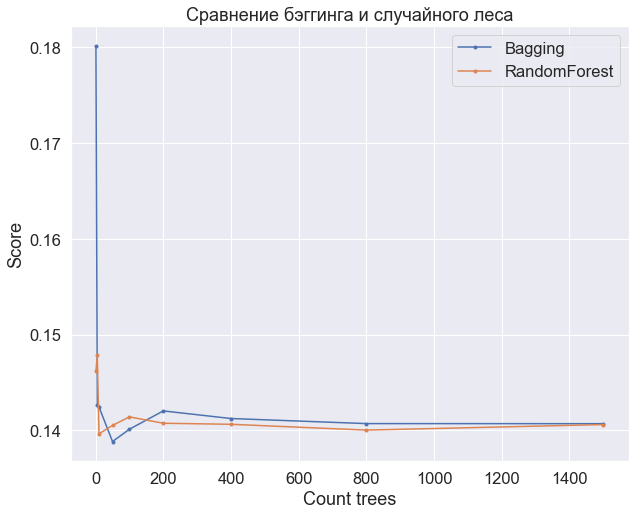

In [146]:
plt.plot(n, scores_bagging, marker='.', label='Bagging')
plt.plot(n, scores_forest, marker='.', label='RandomForest')
plt.grid(True)
plt.title("Сравнение бэггинга и случайного леса")
plt.xlabel('Count trees')
plt.ylabel('Score')
plt.legend(loc='upper right')

### Случайны лес с настройкой параметров

In [ ]:
n_estimators = [100, 300, 500, 800, 1000]
max_features = [0.2, 0.3, 0.4]
max_depths = [10, 20]
min_samples_leaves = [1, 3, 5]

params = {
    "n_estimators": n_estimators, 
    "max_features": max_features,
    "max_depth": max_depths,
    "min_samples_leaf": min_samples_leaves
}

rf = RandomForestRegressor(n_jobs=-1, verbose=0)
est = GridSearchCV(rf, param_grid=params)

In [ ]:
%%time
est.fit(X_train, y_train).best_params_

In [144]:
params = {
    'n_jobs': -1, 
    'max_depth': 20, 
    'max_features': 0.3, 
    'min_samples_leaf': 1, 
    'n_estimators': 800
}
rf = RandomForestRegressor(**params).fit(X_train, y_train)
predict_test = rf.predict(X_test)
predict_train = rf.predict(X_train)

In [145]:
print("log MSE:", mean_squared_error(predict_test, np.log(y_test + 1)))

log MSE: 0.13299331009893078


In [ ]:
# test_id = pd.read_csv('data/test.csv')
# submission = pd.DataFrame({'Id' : test_id['Id'], 'SalePrice' : np.exp(predict_test) - 1})
# submission.to_csv("./submission-rf-09_06_2020.csv", index=False)

y_train mean: 180577.7138927098
predict_train mean: 179258.45623214013


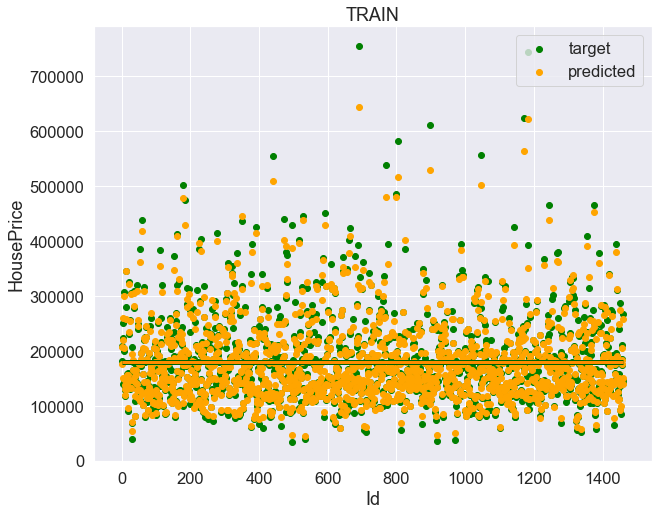

In [149]:
plt.scatter(train['Id'], np.exp(y_train) - 1, c='green', label='target')
plt.scatter(train['Id'], np.exp(predict_train) - 1, c='orange', label='predicted')
plt.hlines(np.mean(np.exp(y_train) - 1), min(train['Id']), max(train['Id']), color='darkgreen', linewidth = 5)
plt.hlines(np.mean(np.exp(predict_train) - 1), min(train['Id']), max(train['Id']), color='darkorange', linewidth = 3)
plt.title('TRAIN')
plt.xlabel('Id')
plt.ylabel('HousePrice')
plt.legend(loc='upper right')
plt.savefig("figures/rf_train.png")
print("y_train mean:", np.mean(np.exp(y_train) - 1))
print("predict_train mean:", np.mean(np.exp(predict_train) - 1))

y_test mean: 179183.91824266256
predict_test mean: 175172.55861768618


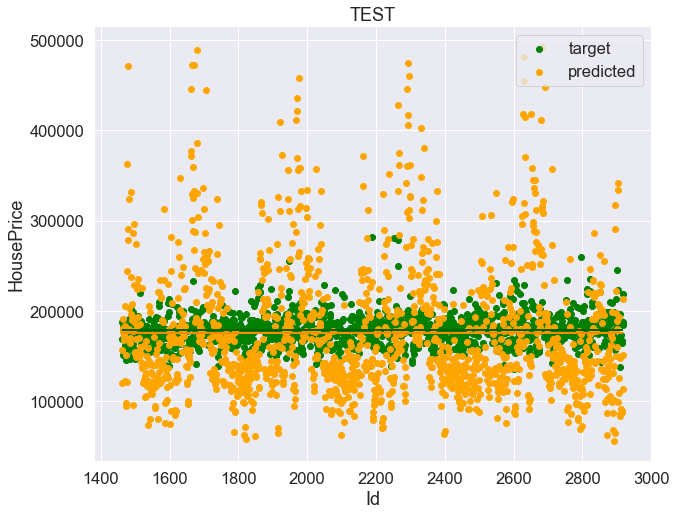

In [150]:
plt.scatter(test['Id'], y_test, c='green', label='target')
plt.scatter(test['Id'], np.exp(predict_test) - 1, c='orange', label='predicted')
plt.hlines(np.mean(y_test), min(test['Id']), max(test['Id']), color='darkgreen', linewidth = 2)
plt.hlines(np.mean(np.exp(predict_test) - 1), min(test['Id']), max(test['Id']), color='darkorange', linewidth = 2)
plt.title('TEST')
plt.xlabel('Id')
plt.ylabel('HousePrice')
plt.legend(loc='upper right')
plt.savefig("figures/rf_test.png")
print("y_test mean:", np.mean(y_test))
print("predict_test mean:", np.mean(np.exp(predict_test) - 1))

Посмотрим на самые ценные признаки:

In [151]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
num_to_plot = 15
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

In [152]:
d = dict()
importances_cols = list()

features = X_train.columns
for i in range(len(features)):
    d[features[i]] = importances[i]
    if d[features[i]] >= 0.005:
        importances_cols.append([features[i], importances[i]])

In [153]:
importances_cols.sort(key=lambda x: x[1], reverse=True)
importances_cols

[['OverallQual', 0.49884260348630505],
 ['TotalArea', 0.27778830021907747],
 ['CentralAir', 0.020596318363814405],
 ['GarageArea', 0.017213219926059484],
 ['GrLivArea', 0.016709595657483776],
 ['LotArea', 0.01532784501712467],
 ['YearRemodAdd', 0.014527633224755882],
 ['BsmtFinSF1', 0.014016918609942402],
 ['TotalBath', 0.013914431372311797],
 ['OverallCond', 0.012970404896168922],
 ['MSZoning', 0.007403622293206638],
 ['Neighborhood', 0.0070531072251913424],
 ['MoSold', 0.006694589215717058],
 ['GarageType', 0.00593162268011625],
 ['TotalPorchSF', 0.00575094418903655]]

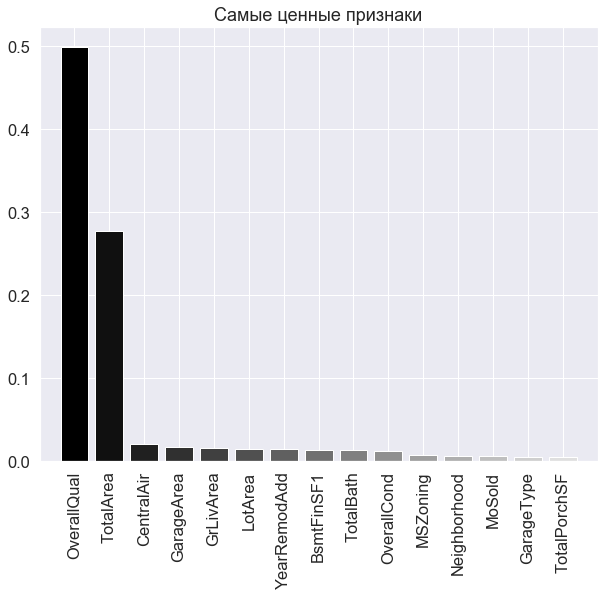

In [155]:
cols = list()
for x in importances_cols:
    cols.append(x[0])

    
fig, ax = plt.subplots()
features = X_train.columns
ax.bar(range(num_to_plot),
       importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
       align="center")


ticks = plt.xticks(range(num_to_plot), feature_indices)
ax.set_xticklabels(cols, rotation = 90)
plt.xlim([-1, num_to_plot])
plt.title("Самые ценные признаки")
# plt.savefig("figures/coolest_features.png")

Выявлено 15 самых ценных признаков. Попробуем теперь обучить модель только на этих признаках. 

In [ ]:
n_estimators = [100, 300, 500, 800, 1000]
max_features = [0.2, 0.3, 0.4]
max_depths = [10, 20]
min_samples_leaves = [1, 3, 5]

params = {
    "n_estimators": n_estimators, 
    "max_features": max_features,
    "max_depth": max_depths,
    "min_samples_leaf": min_samples_leaves
}

rf = RandomForestRegressor(n_jobs=-1, verbose=1)
est = GridSearchCV(rf, param_grid=params)

In [ ]:
%%time
est.fit(X_train[cols], y_train).best_params_

In [ ]:
params = {
    'n_jobs': -1, 
    'max_depth': 20, 
    'max_features': 0.3, 
    'min_samples_leaf': 1, 
    'n_estimators': 500
}
rf = RandomForestRegressor(**params).fit(X_train[cols], y_train)
predict_test_short_cols = rf.predict(X_test[cols])
predict_test_short_cols

In [ ]:
print("log MSE with short columns:", mean_squared_error(predict_test_short_cols, np.log(y_test + 1)))

In [ ]:
test_id = pd.read_csv('data/test.csv')
submission = pd.DataFrame({'Id' : test_id['Id'], 'SalePrice' : np.exp(predict_test_short_cols) - 1})
submission.to_csv("./submission-rf-short-cols-09_06_2020.csv", index=False)

In [ ]:
# На данный момент это лучший вариант:

In [ ]:
params = {
    'n_jobs': -1, 
    'max_depth': 20, 
    'max_features': 0.2, 
    'min_samples_leaf': 1, 
    'n_estimators': 800
}
rf = RandomForestRegressor(**params).fit(X_train, y_train)
predict_test = rf.predict(X_test)
# predict_test = np.expm1(predict_test)
predict_train = rf.predict(X_train)
# predict_train = np.expm1(predict_train)

In [ ]:
# Plot the results
plt.figure()
plt.scatter(y_test, predict_test, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], c="green")
plt.xlabel("data")
plt.ylabel("target")
plt.title("TEST")
plt.legend()
plt.show()

In [ ]:
y_train = np.expm1(y_train)

In [ ]:
# Plot the results
plt.figure()
plt.scatter(y_train, predict_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], c="green")
plt.xlabel("data")
plt.ylabel("target")
plt.title("TRAIN")
plt.legend()
plt.show()

In [ ]:
submission = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : predict_test})
submission.to_csv("./submission-rf-03_06_2020.csv", index=False)

In [ ]:
plt.scatter(X_test['Id'], y_test, c='green', label='target')
plt.scatter(X_test['Id'], predict_test, c='orange', label='predicted')
plt.title('TEST')
plt.legend()

In [ ]:
plt.scatter(train['Id'], y_train, c='green', label='target')
plt.scatter(train['Id'], predict_train, c='orange', label='predicted')
plt.title('TRAIN')
plt.legend()

In [ ]:
# # Визуализация одного дерева

# single_tree = rf.estimators_[5]

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(single_tree, out_file='tree.dot', 
#                 feature_names = train.columns[1:-1],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [ ]:
%%time
xg = xgboost.XGBRegressor()
param_grid = dict(learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], max_depth = [3,4,5,6,8,10,12,15],
                 min_child_weight = [1,3,5,7], gamma = [0.0,0.1,0.2,0.3,0.4], colsample_bytree = [0.3,0.4,0.5,0.6])
grid_xg = RandomizedSearchCV(xg, param_grid, cv=10, scoring = 'r2')
grid_xg.fit(X_train,y_train)

In [ ]:
grid_xg.best_params_

In [ ]:
params_xgb = {
    'min_child_weight': 7,
    'max_depth': 8,
    'learning_rate': 0.1,
    'gamma': 0.0,
    'colsample_bytree': 0.6,
    'n_estimators': 1000
}
xg = xgboost.XGBRegressor(**params_xgb).fit(X_train,y_train)
predict_xg = xg.predict(X_test)
predict_xg

In [ ]:
print(mean_squared_error(predict_xg, np.log(y_test + 1)))